<a href="https://colab.research.google.com/github/Areeff10/image-disease-prediction/blob/main/covid_image_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'covid19-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F627146%2F1117472%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240823%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240823T100202Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D26768b2788a5dc89105999b72324578d088706584a92559f479d19c8b0a46445b3d7972493b32986c0c28f13076df2847c64d83c25b853a89fcadfe04369a22cbe4c41fcd459e987167460b83e842dfbc4f3dc93c559ba9034d661c39e6adfa8dfc671250d8e37d31d4f784800efe3b9bebf903ede364311ad67f87f902a43e8d054ca7301ef17d9f7ef296906924b08650594e82d1df8ab2f65b915020352c6bf19e5d808fc489f6225cb967d04f28664287ed898ea63099d823183a92bd29f49fd92e1c778085721dfc05ed581d49153f0626c0ddb3fdf2a4eb3343a61ffd46e0246d9b0ebab41ff7d1f0af8de1dd60fab79495c1a30e5dbc33fcd3c50fc3f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0117.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0101.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0108.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0119.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0115.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0116.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0105.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0106.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0121.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0111.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0103.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0120.jpeg
/kaggle/input/covid19-image-dataset/Co

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [ ]:
ds_train=tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/covid19-image-dataset/Covid19-dataset/train',
                                                            labels='inferred',
                                                            label_mode='int',
                                                            batch_size=32,
                                                            )
ds_test=tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/covid19-image-dataset/Covid19-dataset/test',
                                                            labels='inferred',
                                                            label_mode='int',
                                                            batch_size=32,
                                                            )

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
for image,label in ds_train.take(1):
    print(image.shape)
for image,label in ds_test.take(1):
    print(image.shape)

(32, 256, 256, 3)
(32, 256, 256, 3)


In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256, 256, 3)))
cnn.add(MaxPooling2D(2,2))
cnn.add(BatchNormalization())

cnn.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(BatchNormalization())

cnn.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(BatchNormalization())

cnn.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(BatchNormalization())

cnn.add(Flatten())


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def normalize(image,label):
  image_n=tf.cast(image/255.,tf.float32)
  # label_n = to_categorical(label, num_classes=5)  # Assuming 5 classes
  return image_n, label
ds_train=ds_train.map(normalize)
ds_test=ds_test.map(normalize)

In [ ]:
cnn.add(Dense(units=32,activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=20,activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=12,activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=3,activation='softmax'))
cnn.add(Dropout(0.2))

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model=cnn.fit(ds_train,epochs=30,validation_data=ds_test)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.8270 - loss: 0.5283 - val_accuracy: 0.6970 - val_loss: 31.0296
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.8535 - loss: 0.3074 - val_accuracy: 0.8182 - val_loss: 14.8847
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.7879 - loss: 0.4720 - val_accuracy: 0.8788 - val_loss: 8.4373
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.8500 - loss: 0.7887 - val_accuracy: 0.5909 - val_loss: 54.3720
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.8602 - loss: 0.3997 - val_accuracy: 0.5606 - val_loss: 74.5493
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.8846 - loss: 0.3787 - val_accuracy: 0.5606 - val_loss: 73.2448
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.8441 - loss: 0.3562 - val_accuracy: 0.5455 - val_loss: 66.0778
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.8639 - loss: 0.4976 - val_accuracy: 0.6364 - val

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, classification_report

y_true = []
y_pred = []

for images, labels in ds_test:
    predictions = cnn.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
F1-Score: 0.8955
Accuracy: 0.8939


In [ ]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0, 0.5, 'epochs')

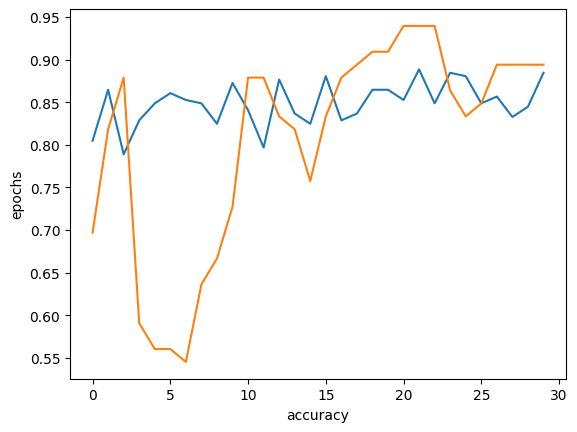

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.title('')

Text(0, 0.5, 'epochs')

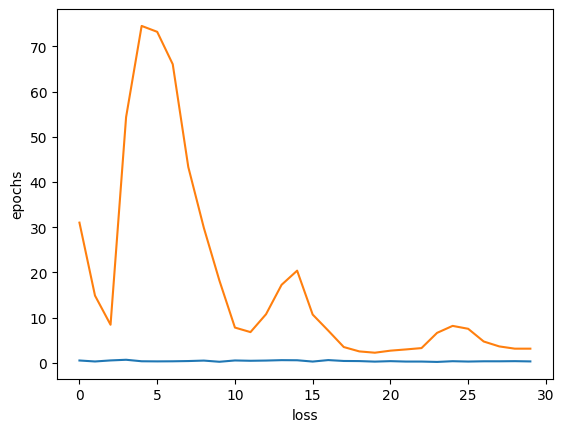

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('loss')
plt.ylabel('epochs')
plt.title()